In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

In [2]:
from google.colab import drive
drive.mount ('/content/gdrive')

# Load the dataset
file_path = '/content/gdrive/My Drive/Colab Notebooks/Final Project Sanbercode (Batch 55)/Data_Negara_HELP.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

Mounted at /content/gdrive


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking the general information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# Checking for missing values
missing_values = data.isnull().sum()

In [5]:
# Display missing values
missing_values

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

**Menangani Outlier dengan Metode IQR**

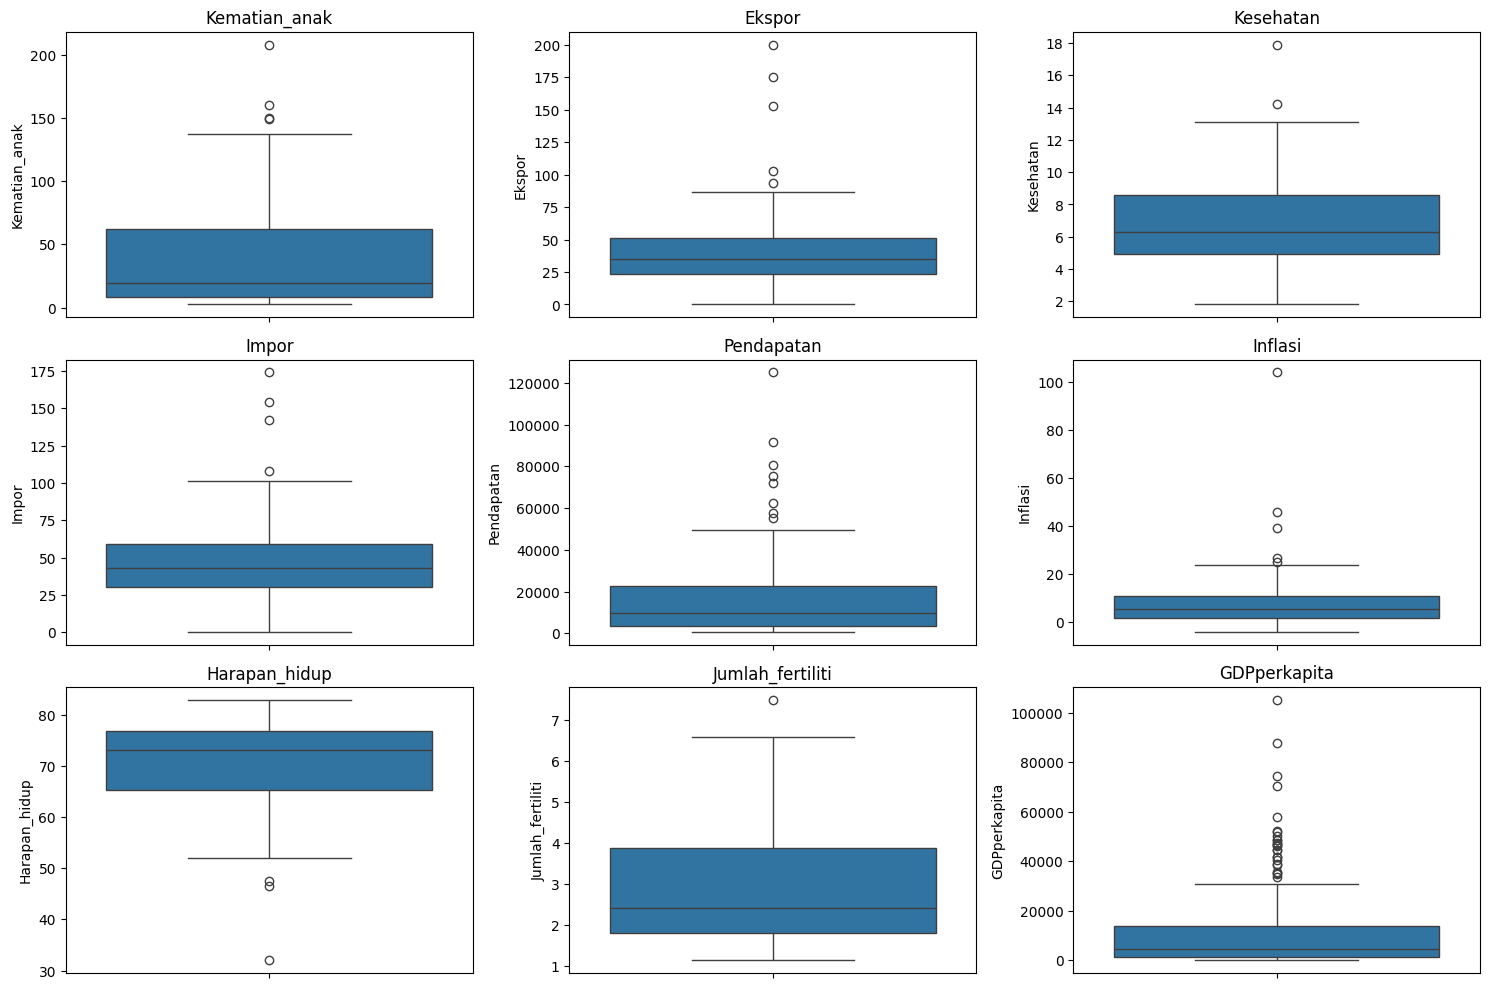

In [7]:
# Visualisasi distribusi data untuk memeriksa outlier
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

**Normalisasi Data dengan Metode Min-Max**

In [8]:
# Fungsi untuk menangani outlier menggunakan metode IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# Menghapus outlier dari data
data_no_outliers = remove_outliers_iqr(data.iloc[:, 1:])

# Menampilkan jumlah data setelah menghapus outlier
data_no_outliers.shape

(128, 9)

In [10]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data
data_normalized = scaler.fit_transform(data_no_outliers)

# Mengubah kembali ke DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=data_no_outliers.columns)

# Menampilkan beberapa baris pertama dari data yang telah dinormalisasi
data_normalized.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,0.650224,0.113963,0.570702,0.484514,0.022348,0.434279,0.140468,0.862782,0.010534
1,0.100149,0.321358,0.465921,0.524500,0.208100,0.236516,0.812709,0.078947,0.126239
2,0.180120,0.441186,0.223805,0.338622,0.274408,0.700360,0.819398,0.312030,0.138343
3,0.865471,0.716560,0.089522,0.462901,0.118126,0.952058,0.270903,0.926692,0.107920
4,0.053064,0.522992,0.413021,0.635810,0.412828,0.114662,0.829431,0.169173,0.391540


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

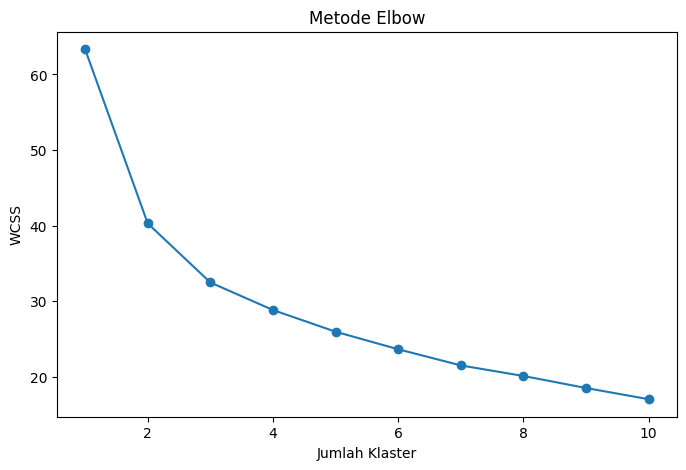

In [12]:
# Metode Elbow untuk menentukan jumlah klaster yang optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

# Plot WCSS untuk melihat "Elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Klasterisasi dengan KMeans untuk 3 klaster
kmeans_3 = KMeans(n_clusters=3, random_state=42)
data_normalized['Cluster_3'] = kmeans_3.fit_predict(data_normalized)

# Klasterisasi dengan KMeans untuk 4 klaster
kmeans_4 = KMeans(n_clusters=4, random_state=42)
data_normalized['Cluster_4'] = kmeans_4.fit_predict(data_normalized)

# Menampilkan beberapa baris pertama dari data yang telah dikelompokkan
data_normalized.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster_3,Cluster_4
0,0.650224,0.113963,0.570702,0.484514,0.022348,0.434279,0.140468,0.862782,0.010534,2,1
1,0.100149,0.321358,0.465921,0.524500,0.208100,0.236516,0.812709,0.078947,0.126239,0,2
2,0.180120,0.441186,0.223805,0.338622,0.274408,0.700360,0.819398,0.312030,0.138343,0,0
3,0.865471,0.716560,0.089522,0.462901,0.118126,0.952058,0.270903,0.926692,0.107920,2,1
4,0.053064,0.522992,0.413021,0.635810,0.412828,0.114662,0.829431,0.169173,0.391540,1,3


In [16]:
# Menambahkan informasi klaster ke data asli
data['Cluster_3'] = data_normalized['Cluster_3']

# Pilih kolom numerik saja untuk perhitungan rata-rata
numeric_columns = data.select_dtypes(include=['number']).columns
cluster_3_means = data[numeric_columns].groupby('Cluster_3').mean()

# Menampilkan hasil analisis klaster dengan 3 klaster
# If you don't have 'ace_tools' installed or available, comment out the line below
# import ace_tools as tools; tools.display_dataframe_to_user(name="Cluster_3_Means", dataframe=cluster_3_means)
print(cluster_3_means)

           Kematian_anak     Ekspor  Kesehatan      Impor    Pendapatan  \
Cluster_3                                                                 
0.0            36.556140  44.753860   6.378070  47.001754  19519.000000   
1.0            40.112500  35.529031   6.944375  44.742684  14654.750000   
2.0            44.582051  37.956410   7.033077  47.371795  15203.025641   

            Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Cluster_3                                                           
0.0        6.741140      71.384211          2.933860  14452.491228  
1.0        8.579219      69.875000          2.868125  10558.312500  
2.0        7.752205      69.400000          3.062051  12303.179487  


In [18]:
# Menambahkan informasi klaster ke data asli
data['Cluster_4'] = data_normalized['Cluster_4']

# Pilih kolom numerik saja untuk perhitungan rata-rata
numeric_columns = data.select_dtypes(include=['number']).columns
cluster_4_means = data[numeric_columns].groupby('Cluster_4').mean()

# Menampilkan hasil analisis klaster dengan 4 klaster
# If you don't have 'ace_tools' installed or available, comment out the line below
# tools.display_dataframe_to_user(name="Cluster_4_Means", dataframe=cluster_4_means)
print(cluster_4_means)

           Kematian_anak     Ekspor  Kesehatan      Impor    Pendapatan  \
Cluster_4                                                                 
0.0            40.140000  45.744000   6.282800  46.332000  18524.520000   
1.0            44.582051  37.956410   7.033077  47.371795  15203.025641   
2.0            33.756250  43.980312   6.452500  47.525000  20295.937500   
3.0            40.112500  35.529031   6.944375  44.742684  14654.750000   

            Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  Cluster_3  
Cluster_4                                                                      
0.0        7.157920      70.912000          3.165200  14429.600000        0.0  
1.0        7.752205      69.400000          3.062051  12303.179487        2.0  
2.0        6.415531      71.753125          2.753125  14470.375000        0.0  
3.0        8.579219      69.875000          2.868125  10558.312500        1.0  
